In [251]:
import numpy as np
import torch
from torch.utils.data.dataset import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import scipy.linalg as slin
import scipy.sparse as sp
import networkx as nx
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import glob
import re
import math
from torch.optim.adam import Adam
from statistics import mean
import random
import warnings
from typing import Dict, List, Tuple, Union

import numpy as np
import pandas as pd
import scipy.linalg as slin
import scipy.optimize as sopt

import networkx as nx
from scipy.sparse import csr_matrix
from utils import *

In [252]:
import numpy as np
import pandas as pd
import os
import pickle

In [253]:
from __future__ import division
from __future__ import print_function

import time
import argparse
import pickle
import os
import random
import torch.optim as optim
from torch.optim import lr_scheduler
import math
from utils import *

from multiprocessing import Pool
import multiprocessing
n_cores = multiprocessing.cpu_count()
from numpy.random import randn
from random import seed as rseed
from numpy.random import seed as npseed
import time

In [254]:
covid_raw=pd.read_csv("C:/Users/Jianian Wang/Desktop/ANOCE-CVAE-master/RealData/Modeldata.csv") #around Los Angeles
#district_12=pd.read_csv("./d12_text_meta_2020_12_08.txt",sep="\t") 

In [255]:
covid_raw["week_count"]=covid_raw["daycount"]//7
covid_raw["week_count"].value_counts()

11    2807
2     2807
18    2807
17    2807
16    2807
15    2807
14    2807
13    2807
12    2807
10    2807
20    2807
9     2807
8     2807
7     2807
6     2807
5     2807
4     2807
3     2807
19    2807
1     2406
21     401
Name: week_count, dtype: int64

In [256]:
covid_agg=covid_raw.groupby(['id','week_count']).mean()
covid_agg.reset_index(inplace=True)

In [257]:
#feature_list=["Mandatory face masks","Contact restrictions","Mobility (mean)","Weather (temperature)","Reported new cases COVID-19"]
feature_list=["Contact restrictions","Mobility (mean)","Searches corona","Reported new cases COVID-19"]

In [258]:
top_list=pd.DataFrame(covid_agg.groupby(['id'])["Reported new cases COVID-19"].mean().sort_values(ascending=False)).reset_index()["id"].to_list()[3:30]

In [259]:
#df_select=covid_agg[covid_agg["id"].isin(covid_agg['id'].unique()[:30])].sort_values(["week_count","id"])
df_select=covid_agg[covid_agg["id"].isin(top_list)].sort_values(["week_count","id"])
df_select=df_select[df_select["week_count"]<21]
#df_select["prop"]=df_select["Reported new cases COVID-19"]/df_select["Population density"]
df_select

,id,week_count,Holiday (report),census_fips_code,Mobility (retail and recreation),Mobility (grocery and pharmacy),Mobility (parks),Mobility (transit stations),Mobility (workplaces),Mobility (residential),...,Age (pop. younger 18),Nursing homes,COVID-19 burden,bl_id,cases,deaths,recovered,Reported new cases COVID-19,Active cases,daycount
525,3159000,1,-0.035714,NaN,29.115568,5.940524,-35.096782,33.080228,22.458639,-7.793172,...,-1.072569,50.890274,-3.497203,3.0,0.000000,0.0,0.0,0.000000,0.000000,10.5
546,3241000,1,-0.035714,NaN,29.115568,5.940524,-35.096782,33.080228,22.458639,-7.793172,...,0.327431,181.890274,-3.497203,3.0,0.000000,0.0,0.0,0.000000,0.000000,10.5
1197,3459000,1,-0.035714,NaN,29.115568,5.940524,-35.096782,33.080228,22.458639,-7.793172,...,1.727431,53.890274,-3.497203,3.0,0.000000,0.0,0.0,0.000000,0.000000,10.5
1281,4011000,1,-0.035714,NaN,26.448902,0.773857,-27.763449,30.746895,21.791972,-7.793172,...,-0.372569,95.890274,-3.497203,4.0,0.000000,0.0,0.0,0.000000,0.000000,10.5
1323,5111000,1,-0.035714,NaN,30.282235,6.107190,-30.930115,34.913561,22.291972,-7.959838,...,-0.172569,28.890274,-3.497203,5.0,0.000000,0.0,0.0,0.000000,0.000000,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534,8417000,20,-0.035714,NaN,17.044140,5.797667,36.593694,11.437371,8.387211,-3.697934,...,0.227431,2.890274,-2.354346,8.0,1224.142857,77.0,1144.0,0.285714,13.142857,143.0
5017,9184000,20,-0.035714,NaN,17.758425,4.369095,40.736551,7.723085,8.244353,-4.269362,...,2.027431,4.890274,-1.497203,9.0,1468.285714,91.0,1356.0,2.000000,29.000000,143.0
5080,9187000,20,-0.035714,NaN,17.758425,4.369095,40.736551,7.723085,8.244353,-4.269362,...,1.027431,22.890274,-3.068632,9.0,2303.285714,199.0,2088.0,1.428571,16.285714,143.0
5122,9189000,20,-0.035714,NaN,17.758425,4.369095,40.736551,7.723085,8.244353,-4.269362,...,0.127431,-9.109726,-3.354346,9.0,1306.000000,88.0,1218.0,0.000000,1.428571,143.0


In [272]:
covid_raw[covid_raw["Contact restrictions"]>0]["week_count"].unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
      dtype=int64)

## create basis & function demo


Bad key "text.kerning_factor" on line 4 in
D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


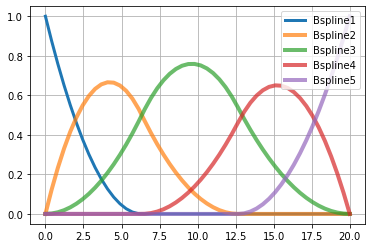

In [12]:
from scipy.interpolate import BSpline
k =2
time_stamp=len(df_select["week_count"].unique())
x = np.array(range(0, time_stamp))
m = 2
step = (x[-1] - x[0]) / (m + 1)
t = [0,0,0]+list(np.linspace(step, m * step, m))+[time_stamp,time_stamp,time_stamp]##create knots
c1 = [1,0,0,0,0]
c2 = [0,1,0,0,0]
c3 = [0,0,1,0,0]
c4 = [0,0,0,1,0]
c5 = [0,0,0,0,1]
spl1 = BSpline(t, c1, k)
spl2 = BSpline(t, c2, k)
spl3 = BSpline(t, c3, k)
spl4 = BSpline(t, c4, k)
spl5 = BSpline(t, c5, k)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xx = np.linspace(0, time_stamp,  50)
ax.plot(xx, spl1(xx), lw=3, label='Bspline1')
ax.plot(xx, spl2(xx), lw=4, alpha=0.7, label='Bspline2')
ax.plot(xx, spl3(xx), lw=4, alpha=0.7, label='Bspline3')
ax.plot(xx, spl4(xx), lw=4, alpha=0.7, label='Bspline4')
ax.plot(xx, spl5(xx), lw=4, alpha=0.7, label='Bspline5')
ax.grid(True)
ax.legend(loc='best')
plt.show()

In [13]:
feature_list

['Contact restrictions',
 'Mobility (mean)',
 'Searches corona',
 'Reported new cases COVID-19']

In [14]:
# ----------- Configurations:
#time_stamp=10
n_timestamp=time_stamp
#sample__time=30
n =data.shape[0]
d=data.shape[1]
sample__time=int(n/n_timestamp)
n_var = data.shape[1] # The number of variables in data.
x_dims = 1 # The number of input dimensions: default 1.
z_dims = d # The number of latent variable dimensions: default the same as variable size.


In [15]:
sample__time

27

In [16]:
n_timestamp

20

In [17]:
d

4

In [18]:
n

540

In [19]:
n_var

4

In [20]:
def create_D(X,spline_list):
    D_all=np.zeros((sample__time*time_stamp, n_var*len(spline_list),1))
    for j in range(len(spline_list)):
        D_column=np.zeros((sample__time*time_stamp, n_var,1))#for each spline
        for i in range(0,n_timestamp):
            D_column[(sample__time*i):(sample__time*(i+1)),:,:]=X[(sample__time*i):(sample__time*(i+1)),:]*spline_list[j](i)#X_i *f(i), stack horizontally
        ##horizontally append
        D_all[:,n_var*j:n_var*(j+1),:]=D_column
        #print((n_features*j,n_features*(j+1)))
    return(D_all)

In [21]:
#spline_list=[spl_const]
spline_list=[spl1,spl2,spl3,spl4,spl5]

In [22]:
def spl_consraint(spline_list,t,p):
    k=len(spline_list)
    output=torch.zeros(((p*k), p))
    identity=torch.zeros((p, p*k))
    for i in range(k):
        output[(i*p):(i*p+p),:]=torch.ones((p,p))*spline_list[i](t).item() #gamma times basis
        identity[:,(i*p):(i*p+p)]=torch.eye(p) #stacked identity matrix
    #final=torch.matmul(identity,output)
    return output, identity

In [28]:
###edited to remove the first column in the lagged weigttsv
def fun_h2_B_new(B):
    '''compute constraint h2(B) value'''
    d = B.shape[0]
    gamma=B[p:(p+p*k),:p]
    Tau=B[(p+p*k):,:]
    h3_B = sum(sum(abs(B[:p, :])))+sum(abs(gamma[:, 0]))+sum(sum(abs(B[p:, p:])))+ sum(abs(Tau[:, 0]))# uppper 0 and 0 column and every p-1,2p-1 row
    for i in range(k):
        h3_B=h3_B+sum(abs(gamma[((i+1)*p-1), 1:]))
    return h3_B

In [29]:
def fun_h1_B(B):
    '''compute constraint h1(B) value'''
    d = B.shape[0]
    expm_B = matrix_poly(B * B, d)
    h1_B = torch.trace(expm_B) - d
    return h1_B.float()

In [30]:
def train_new(epoch, lambda1, c_B, lambda2, d_B, optimizer, old_lr,p,k):
        
        nll_train = []
        kl_train = []
        mse_train = []
        encoder.train()
        decoder.train()
        scheduler.step()

        # Update optimizer
        optimizer, lr = update_optimizer(optimizer, old_lr, c_B, d_B)

        for batch_idx, (data, relations) in enumerate(train_loader):

            data, relations = Variable(data).double(), Variable(relations).double()
            relations = relations.unsqueeze(2) # Reshape data

            optimizer.zero_grad()

            enc_x, logits, origin_B, adj_A_tilt_encoder, z_gap, z_positive, myA, Wa = encoder(data, rel_rec, rel_send) 
            edges = logits # Logits is of size: [num_sims, z_dims]

            dec_x, output, adj_A_tilt_decoder = decoder(data, edges, d * x_dims, rel_rec, rel_send, origin_B, adj_A_tilt_encoder, Wa)

            if torch.sum(output != output):
                print('nan error\n')

            target = data
            preds = output
            variance = 0.
            
            # Compute constraint functions h1(B) and h2(B)
            #h1_B = fun_h1_B(origin_B[p:,p:]) #acyclity on G
            h1_B =0
            for i in range(n_timestamp):
                #aa=torch.matmul(spl_consraint(spline_list,i,p).type(torch.FloatTensor),origin_B[p:,:p].type(torch.FloatTensor))#acyclity on Gamma
                #print(fun_h1_B(aa))
                output, identity=spl_consraint(spline_list,i,p)
                h1_B=h1_B+fun_h1_B(torch.matmul(identity.type(torch.FloatTensor),(output.type(torch.FloatTensor)*origin_B[p:(p+p*k),:p].type(torch.FloatTensor))))#acyclity on Gamma
            h2_B = fun_h2_B_new(origin_B) ##handle the zero on gamma and top
            # Reconstruction accuracy loss:
            loss_nll = nll_gaussian(preds, target, variance)
            # KL loss:
            loss_kl = kl_gaussian(logits)
            # ELBO loss:
            loss = loss_kl + loss_nll
            # Loss function:
            loss += lambda1 * h1_B + 0.5 * c_B * h1_B * h1_B + lambda2 * h2_B + 0.5 * d_B * h2_B * h2_B + 100. * torch.trace(origin_B * origin_B)

            loss.backward()
            loss = optimizer.step()

            myA.data = stau(myA.data, tau_B * lr)

            if torch.sum(origin_B != origin_B):
                print('nan error\n')

            mse_train.append(F.mse_loss(preds, target).item())
            nll_train.append(loss_nll.item())
            kl_train.append(loss_kl.item())

        return np.mean(np.mean(kl_train) + np.mean(nll_train)), np.mean(nll_train), np.mean(mse_train), origin_B, optimizer, lr


In [31]:
time_stamp

20

In [32]:
sample__time

27

In [33]:
import time
time_stamp=19 #####edited##############
n_times=1 #no. of replicates
np.random.seed(1234567) #Random seed
seed_list=np.random.randint(1, 1000000, size=n_times)
average_coef_list_new=np.zeros((n_times,time_stamp,n_var,n_var))
lambda_list=np.zeros((n_times,20,n_var))
t_list=np.zeros((n_times,20,n_var))
for replicate in range(n_times):
  seed=seed_list[replicate]
  #X_all=simulate_lsem_dynamic(W_all,Z_graph,30,10, 'Binary',noise_scale=0.1).reshape(330,5,1) #create data
  X_all=np.array(data).reshape(data.shape[0],d,1)
  X=X_all[sample__time:,:,:]
  Y=X_all[:-sample__time,:,:]

  D=create_D(X,spline_list)
  G=create_D(Y,spline_list)
  data_all=np.append(X,D, axis=1)
  data_all=np.append(data_all,G, axis=1)
  print(np.shape(data_all))
  average_list=np.zeros((time_stamp,n_var, n_var))
  
  ####estimate at each time_stamp####
  timestart_new=time.time()
    # ----------- Configurations::

  n = 1*time_stamp # The number of samples of data.
  d = 65 # The number of variables in data after basis.
  x_dims = 1 # The number of input dimensions: default 1.
  z_dims = d # The number of latent variable dimensions: default the same as variable size.
  epochs = 200 # Number of epochs to train.
  batch_size = 10 # Number of samples per batch. note: should be divisible by sample size, otherwise throw an error.
  k_max_iter = int(1e2) # The max iteration number for searching parameters.
  original_lr = 3e-3  # Initial learning rate.
  encoder_hidden = d^2 # Number of hidden units, adaptive to dimension of nodes (d^2).
  decoder_hidden = d^2 # Number of hidden units, adaptive to dimension of nodes (d^2).
  temp = 0.5 # Temperature for Gumbel softmax.
  factor = True # Factor graph model.
  encoder_dropout = 0.0 # Dropout rate (1 - keep probability).
  decoder_dropout = 0.0 # Dropout rate (1 - keep probability).
  tau_B = 0. # Coefficient for L-1 norm of matrix B.
  lambda1 = 0. # Coefficient for DAG constraint h1(B).
  lambda2 = 0. # Coefficient for identification constraint h2(B).
  c_B = 1 # Coefficient for absolute value h1(B).
  d_B = 1 # Coefficient for absolute value h2(B).
  e_B = 1 # Coefficient for absolute value h3(B)
  h1_tol = 1e-8 # The tolerance of error of h1(B) to zero.
  h2_tol = 1e-8 # The tolerance of error of h2(B) to zero.
  h3_tol = 1e-8 # The tolerance of error of h2(B) to zero.
  lr_decay = 200 # After how many epochs to decay LR by a factor of gamma. 
  gamma = 1.0 # LR decay factor.  
    ######################
  p=4
  k=5 #no.of basis
  np.random.seed(seed)
  random.seed(seed)
  torch.manual_seed(seed)
  feat_train = torch.FloatTensor(data_all)
  feat_valid = torch.FloatTensor(data_all)
  feat_test = torch.FloatTensor(data_all)

  # Reconstruct itself
  train_data = TensorDataset(feat_train, feat_train)
  valid_data = TensorDataset(feat_valid, feat_train)
  test_data = TensorDataset(feat_test, feat_train)

  train_loader = DataLoader(train_data, batch_size = batch_size)
  valid_loader = DataLoader(valid_data, batch_size = batch_size)
  test_loader = DataLoader(test_data, batch_size = batch_size)

  # ----------- Load modules:
  d1=p+p*k+p*k
  off_diag = np.ones([d1, d1]) - np.eye(d1) # Generate off-diagonal interaction graph
  rel_rec = np.array(encode_onehot(np.where(off_diag)[1]), dtype = np.float64)
  rel_send = np.array(encode_onehot(np.where(off_diag)[0]), dtype = np.float64)
  rel_rec = torch.DoubleTensor(rel_rec)
  rel_send = torch.DoubleTensor(rel_send)
  adj_A = np.zeros((d1, d1)) # Add adjacency matrix

  encoder = MLPEncoder(d1 * x_dims, x_dims, encoder_hidden,
                          int(z_dims), adj_A,
                          batch_size = batch_size,
                          do_prob = encoder_dropout, factor = factor).double()
  decoder = MLPDecoder(d1 * x_dims,
                          z_dims, x_dims, encoder,
                          data_variable_size = d1,
                          batch_size = batch_size,
                          n_hid=decoder_hidden,
                          do_prob=decoder_dropout).double()

  # ----------- Set up optimizer:
  optimizer = Adam(list(encoder.parameters()) + list(decoder.parameters()), lr = original_lr)
  scheduler = lr_scheduler.StepLR(optimizer, step_size = lr_decay,
                                  gamma = gamma)

  rel_rec = Variable(rel_rec)
  rel_send = Variable(rel_send)

  # ----------- Main:
  best_ELBO_loss = np.inf
  best_NLL_loss = np.inf
  best_MSE_loss = np.inf
  h1_B_new = 1 #torch.tensor(1.)
  h2_B_new = 1
  h1_B_old = np.inf
  h2_B_old = np.inf
  lr = original_lr

  try:
      for step_k in range(k_max_iter):
          while c_B * d_B < 1e+20:
              for epoch in range(epochs):
                  old_lr = lr 
                  ELBO_loss, NLL_loss, MSE_loss, origin_B, optimizer, lr = train_new(epoch, lambda1, c_B, lambda2, d_B, optimizer, old_lr,p=p,k=k)

                  if ELBO_loss < best_ELBO_loss:
                      best_ELBO_loss = ELBO_loss

                  if NLL_loss < best_NLL_loss:
                      best_NLL_loss = NLL_loss

                  if MSE_loss < best_MSE_loss:
                      best_MSE_loss = MSE_loss

              if ELBO_loss > 2 * best_ELBO_loss:
                  break

              # Update parameters
              B_new = origin_B.data.clone()
              #h1_B = fun_h1_B(B_new[p:,p:]) #acyclity on G
              h1_B=0 
              for i in range(n_timestamp):

                  output, identity=spl_consraint(spline_list,i,p)
                  h1_B=h1_B+fun_h1_B(torch.matmul(identity.type(torch.FloatTensor),(output.type(torch.FloatTensor)*B_new[p:(p+p*k),:p].type(torch.FloatTensor))))
                  h2_B = fun_h2_B_new(B_new) ##handle the zero on gamma and top


              if h1_B_new > 0.25 * h1_B_old and h2_B_new > 0.25 * h2_B_old:
                  c_B *= 10
                  d_B *= 10
              elif h1_B_new > 0.25 * h1_B_old and h2_B_new < 0.25 * h2_B_old:
                  c_B *= 10
              elif h1_B_new < 0.25 * h1_B_old and h2_B_new > 0.25 * h2_B_old:
                  d_B *= 10
              else:
                  break

          # Update parameters    
          h1_B_old = h1_B_new
          h2_B_old = h2_B_new
          lambda1 += c_B * h1_B_new
          lambda2 += d_B * h2_B_new

          if h1_B_new <= h1_tol and h2_B_new <= h2_tol:
              break

  except KeyboardInterrupt:
      print('KeyboardInterrupt')

  predB = np.matrix(origin_B.data.clone().numpy())
  print('Best ELBO Loss :', best_ELBO_loss)
  print('Best NLL Loss :', best_NLL_loss)
  print('Best MSE Loss :', best_MSE_loss)
  #calculate_effect(predB)
  pred_gamma=predB[p:(p+p*k),:p]
  lambda_list[replicate,::]=pred_gamma
  np.save("gamma_real_csontraint",lambda_list)
    
  pred_t=predB[(p+p*k):(p+p*k+p*k),:p]
  t_list[replicate,::]=pred_t
  np.save("quadra_real_csontraint",t_list)
  
  print(replicate)


(513, 44, 1)


D:\Anaconda\lib\site-packages\torch\optim\lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Best ELBO Loss : 0.02172310133928428
Best NLL Loss : 0.00017741547032818327
Best MSE Loss : 8.06433956037197e-06
0


In [35]:
n_times=1
p=4
time_stamp=20
gamma=np.load("gamma_real_csontraint.npy")
t=np.load("quadra_real_csontraint.npy")
def matrix_gen_next(t,pred_gamma):
    output,identity=spl_consraint(spline_list,t,p)
    return torch.matmul(identity.type(torch.FloatTensor),torch.from_numpy((np.multiply(output.numpy(),pred_gamma))).type(torch.FloatTensor)).T

In [41]:
n_times=1
p=4
time_stamp=20
gamma=np.load("gamma_real_csontraint.npy")
t=np.load("quadra_real_csontraint.npy")
def matrix_gen_next(t,pred_gamma):
    output,identity=spl_consraint(spline_list,t,p)
    return torch.matmul(identity.type(torch.FloatTensor),torch.from_numpy((np.multiply(output.numpy(),pred_gamma))).type(torch.FloatTensor)).T

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
#feature_list=["Mandatory face masks","Contact restrictions","Mobility (mean)","Weather (temperature)","Reported new cases COVID-19"]
feature_list=["Contact restrictions","Mobility (mean)","Searches corona","Reported new cases COVID-19"]
feature_list_short=['Contact restrictions',
 'Mobility',
 'Searches',
 'Reported new cases COVID-19']

In [43]:
pos = {
  0: [2.0,2.0],
  1: [3.0,1.0],
  2: [1.0,1.0],
  3: [2.0,0.0]
}

(0.79, 3.21, -0.21000000000000002, 2.21)

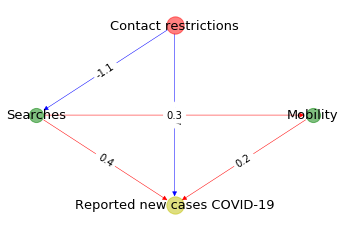

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx
import matplotlib.pyplot as plt

time=2
average_B = matrix_gen_next(time,gamma[0]).numpy()
average_B[np.abs(average_B) < 0.2] = 0 
plotG = nx.DiGraph(average_B.T)
edges,weights = zip(*nx.get_edge_attributes(plotG,'weight').items())
#pos = nx.spring_layout(plotG,seed=1234567) # positions for all nodes
nx.draw_networkx_nodes(plotG, pos,
                       nodelist = [0],
                       node_color = 'r',
                       node_size = 300,
                   alpha = 0.5)
nx.draw_networkx_nodes(plotG, pos,
                       nodelist =[1,2],
                       node_color = 'g',
                       node_size = 200,
                   alpha = 0.5)
nx.draw_networkx_nodes(plotG, pos, 
                       nodelist = [3],
                       node_color = 'y',
                       node_size = 300,
                   alpha = 0.5)

# edges with color an weight

# some math labels
labels={}
for i in range(len(feature_list_short)):
    labels[i] = (feature_list_short)[i]       
def color_edge(x):
    if x>0:
        return "r"
    else:
        return "b"

#edge_pos = nx.spring_layout(plotG, k=10)
edge_labels = {e: round(plotG.edges[e]['weight'],1) for e in plotG.edges}
edge_color = [color_edge(plotG.edges[e]['weight']) for e in plotG.edges]
nx.draw_networkx_edges(plotG, pos, width = .5, alpha = 1, edgelist=edges, edge_color=edge_color, edge_vmin=-1, edge_vmax=1)
nx.draw_networkx_labels(plotG, pos, labels, font_size = 13)
nx.draw_networkx_edge_labels(plotG,pos, edge_labels=edge_labels)
plt.axis('off')
#plt.show() # display
#plt.savefig('figure/first_week.pdf')
#plt.savefig('figure/last_week.pdf')

(0.79, 3.21, -0.21000000000000002, 2.21)

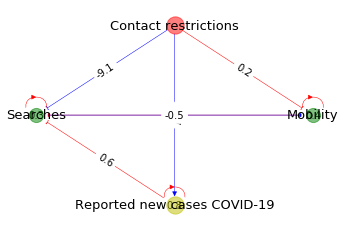

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx
import matplotlib.pyplot as plt

time=3
gamma=np.load("gamma_real_csontraint.npy")
t=np.load("quadra_real_csontraint.npy")
def matrix_gen_next(t,pred_gamma):
    output,identity=spl_consraint(spline_list,t,p)
    return torch.matmul(identity.type(torch.FloatTensor),torch.from_numpy((np.multiply(output.numpy(),pred_gamma))).type(torch.FloatTensor)).T
average_B = matrix_gen_next(time,t[0]).numpy()
average_B[np.abs(average_B) < 0.2] = 0 
plotG = nx.DiGraph(average_B.T)
edges,weights = zip(*nx.get_edge_attributes(plotG,'weight').items())
#pos = nx.spring_layout(plotG,seed=1234567) # positions for all nodes
nx.draw_networkx_nodes(plotG, pos,
                       nodelist = [0],
                       node_color = 'r',
                       node_size = 300,
                   alpha = 0.5)
nx.draw_networkx_nodes(plotG, pos,
                       nodelist =[1,2],
                       node_color = 'g',
                       node_size = 200,
                   alpha = 0.5)
nx.draw_networkx_nodes(plotG, pos, 
                       nodelist = [3],
                       node_color = 'y',
                       node_size = 300,
                   alpha = 0.5)

# edges with color an weight

# some math labels
labels={}
for i in range(len(feature_list_short)):
    labels[i] = (feature_list_short)[i]       
def color_edge(x):
    if x>0:
        return "r"
    else:
        return "b"

#edge_pos = nx.spring_layout(plotG, k=10)
edge_labels = {e: round(plotG.edges[e]['weight'],1) for e in plotG.edges}
edge_color = [color_edge(plotG.edges[e]['weight']) for e in plotG.edges]
nx.draw_networkx_edges(plotG, pos, width = .5, alpha = 1, edgelist=edges, edge_color=edge_color, edge_vmin=-1, edge_vmax=1)
nx.draw_networkx_labels(plotG, pos, labels, font_size = 13)
nx.draw_networkx_edge_labels(plotG,pos, edge_labels=edge_labels)
plt.axis('off')
#plt.show() # display
#plt.savefig('figure/first_week.pdf')
#plt.savefig('figure/last_week.pdf')

(0.79, 3.21, -0.15046486828450611, 2.154784041346881)

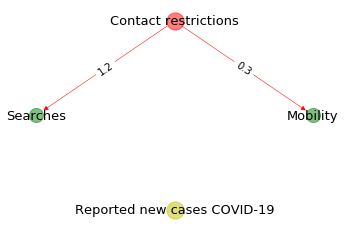

In [289]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx
import matplotlib.pyplot as plt

time=18
gamma=np.load("gamma_real_csontraint.npy")
t=np.load("quadra_real_csontraint.npy")
def matrix_gen_next(t,pred_gamma):
    output,identity=spl_consraint(spline_list,t,p)
    return torch.matmul(identity.type(torch.FloatTensor),torch.from_numpy((np.multiply(output.numpy(),pred_gamma))).type(torch.FloatTensor)).T
average_B = matrix_gen_next(time,gamma[0]).numpy()
average_B[np.abs(average_B) < 0.2]= 0 
plotG = nx.DiGraph(average_B.T)
edges,weights = zip(*nx.get_edge_attributes(plotG,'weight').items())
#pos = nx.spring_layout(plotG,seed=1234567) # positions for all nodes
nx.draw_networkx_nodes(plotG, pos,
                       nodelist = [0],
                       node_color = 'r',
                       node_size = 300,
                   alpha = 0.5)
nx.draw_networkx_nodes(plotG, pos,
                       nodelist =[1,2],
                       node_color = 'g',
                       node_size = 200,
                   alpha = 0.5)
nx.draw_networkx_nodes(plotG, pos, 
                       nodelist = [3],
                       node_color = 'y',
                       node_size = 300,
                   alpha = 0.5)

# edges with color an weight

# some math labels
labels={}
for i in range(len(feature_list_short)):
    labels[i] = (feature_list_short)[i]       
def color_edge(x):
    if x>0:
        return "r"
    else:
        return "b"

#edge_pos = nx.spring_layout(plotG, k=10)
edge_labels = {e: round(plotG.edges[e]['weight'],1) for e in plotG.edges}
edge_color = [color_edge(plotG.edges[e]['weight']) for e in plotG.edges]
nx.draw_networkx_edges(plotG, pos, width = .5, alpha = 1, edgelist=edges, edge_color=edge_color, edge_vmin=-1, edge_vmax=1)
nx.draw_networkx_labels(plotG, pos, labels, font_size = 13)
nx.draw_networkx_edge_labels(plotG,pos, edge_labels=edge_labels)
plt.axis('off')
#plt.show() # display
#plt.savefig('figure/first_week.pdf')
#plt.savefig('figure/last_week.pdf')

(0.79, 3.21, -0.21000000000000002, 2.21)

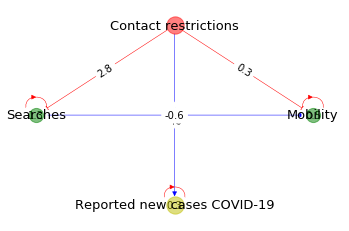

In [288]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx
import matplotlib.pyplot as plt

time=18
gamma=np.load("gamma_real_csontraint.npy")
t=np.load("quadra_real_csontraint.npy")
def matrix_gen_next(t,pred_gamma):
    output,identity=spl_consraint(spline_list,t,p)
    return torch.matmul(identity.type(torch.FloatTensor),torch.from_numpy((np.multiply(output.numpy(),pred_gamma))).type(torch.FloatTensor)).T
average_B = matrix_gen_next(time,t[0]).numpy()
average_B[np.abs(average_B) < 0.2] = 0 
plotG = nx.DiGraph(average_B.T)
edges,weights = zip(*nx.get_edge_attributes(plotG,'weight').items())
#pos = nx.spring_layout(plotG,seed=1234567) # positions for all nodes
nx.draw_networkx_nodes(plotG, pos,
                       nodelist = [0],
                       node_color = 'r',
                       node_size = 300,
                   alpha = 0.5)
nx.draw_networkx_nodes(plotG, pos,
                       nodelist =[1,2],
                       node_color = 'g',
                       node_size = 200,
                   alpha = 0.5)
nx.draw_networkx_nodes(plotG, pos, 
                       nodelist = [3],
                       node_color = 'y',
                       node_size = 300,
                   alpha = 0.5)

# edges with color an weight

# some math labels
labels={}
for i in range(len(feature_list_short)):
    labels[i] = (feature_list_short)[i]       
def color_edge(x):
    if x>0:
        return "r"
    else:
        return "b"

#edge_pos = nx.spring_layout(plotG, k=10)
edge_labels = {e: round(plotG.edges[e]['weight'],1) for e in plotG.edges}
edge_color = [color_edge(plotG.edges[e]['weight']) for e in plotG.edges]
nx.draw_networkx_edges(plotG, pos, width = .5, alpha = 1, edgelist=edges, edge_color=edge_color, edge_vmin=-1, edge_vmax=1)
nx.draw_networkx_labels(plotG, pos, labels, font_size = 13)
nx.draw_networkx_edge_labels(plotG,pos, edge_labels=edge_labels)
plt.axis('off')
#plt.show() # display
#plt.savefig('figure/first_week.pdf')
#plt.savefig('figure/last_week.pdf')

In [201]:
x_values

DatetimeIndex(['2020-02-25', '2020-03-03', '2020-03-10', '2020-03-17',
               '2020-03-24', '2020-03-31', '2020-04-07', '2020-04-14',
               '2020-04-21', '2020-04-28', '2020-05-05', '2020-05-12',
               '2020-05-19', '2020-05-26', '2020-06-02', '2020-06-09',
               '2020-06-16', '2020-06-23', '2020-06-30', '2020-07-07'],
              dtype='datetime64[ns]', freq=None)

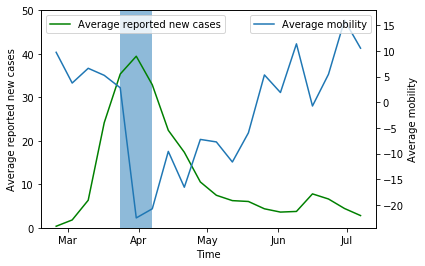

In [284]:
import matplotlib.dates as mdates
from datetime import datetime
date_week_df=covid_raw[["date","daycount","week_count"]][covid_raw["daycount"]%7==3].drop_duplicates()
fig, ax = plt.subplots()

#ax.plot(s)
x_values =pd.to_datetime(date_week_df["date"].unique())
y_values =df_select.groupby("week_count").mean()["Reported new cases COVID-19"]
ax.plot(x_values,y_values,color="green")
myFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(myFmt)
ax.legend(["Average reported new cases"],loc='upper left')
ax.set(xlabel='Time', ylabel='Average reported new cases')
plt.ylim([0, 50])
ax.fill_between([x_values[4],x_values[5],x_values[6]],[50,50,50],alpha=0.5)
#ax.grid()
ax2=ax.twinx()
ax2.set(ylabel='Average mobility')
ax2.plot(x_values,df_select.groupby("week_count").mean()["Mobility (mean)"])
ax2.legend(['Average mobility'],loc='upper right')
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(myFmt)
plt.savefig('realdata.pdf')

In [231]:
def calculate_treatment(B):
    d=B.shape[0]
    gamma=B[0,(d-1)]
    alpha=B[0,1:(d-1)]
    C=B[1:(d-1),1:(d-1)]
    beta=B[1:(d-1),(d-1)]
    TE=gamma+np.dot((np.dot((beta.T), np.linalg.inv(np.identity(d - 2) - C.T))),alpha.T)
    return(TE)
    
    

In [232]:
from utils import *
gamma=np.load("gamma_real_csontraint.npy")
treatment_effect=[]
for i in range(19):
    average_B = matrix_gen_next(i,gamma[0]).numpy()
    treatment_effect.append(calculate_treatment(average_B.T))

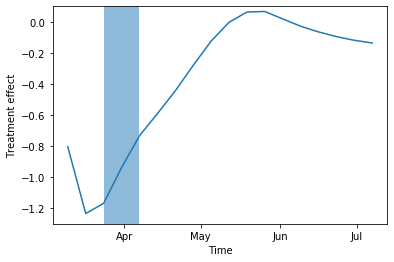

In [285]:
fig, ax = plt.subplots()
ax.plot(x_values[2:],treatment_effect[1:])
myFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(myFmt)
ax.set(xlabel='Time', ylabel='Treatment effect')
ax.fill_between([x_values[4],x_values[6]],[-1.3,-1.3],[0.1,0.1],alpha=0.5)
plt.ylim([-1.3, 0.1])
#ax.grid()
plt.savefig('treatment_effect.pdf')